<div align="right">Python 2.7 Jupyter Notebook</div>

# Predictive modeling using Bandicoot features
<br>
<div class="alert alert-warning">
<b>Note that this notebook contains advanced exercises that are only applicable to students who wish to deepen their understanding and qualify for bonus marks on this course. </b>You will be able to achieve 100% for this notebook by completing Exercises 1 to 4. An optional, additional exercise (Exercise 5) can be completed to qualify for bonus marks.
</div>

### Your completion of the notebook exercises will be graded based on your ability to do the following: 

> **Understand**: Do your pseudo-code and comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code (using the supplied examples) that performs the required functionality on supplied or generated data sets? 

> **Analyze**: Are you able to pick the relevant method or library to resolve specific stated questions?

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

> **Create**:  Are you able to produce notebooks that serve as computational records of a session that can be used to share your insights with others?

#### Notebook objectives
By the end of this notebook, you will be expected to:

> - Understand what machine learning is;
- Explain the bias-variance trade-off;
- Fit different models to data that you have collected; and
- Interpret binary classification model results using confusion matrices and receiver operating characteristic (ROC) curves.
 
####  List of exercises:
>   - **Exercise 1:** Machine learning concepts.
  - **Exercise 2:** Simple ROC curve interpretation.
  - **Exercise 3:** Interpreting results of binary classification model.
  - **Exercise 4:** Analysis of ROC curves and general model improvement strategies.
  - **Exercise 5 [Advanced]:**  Building a $k$ nearest neighbor classification model.

# Notebook introduction
This notebook serve as a brief introduction to the exciting field of machine learning, and provides you with hands-on examples of the various steps you are likely to perform. You will use a number of Python libraries, introduced in earlier modules, to generate features and compute behavioral indicators.

> **Note**:

> Although a lot of the terms introduced in this notebook will be new to many students, these terms will make more sense once you have worked through the notebook.

The approach followed in this notebook entails computing a number of behavioral indicators and defining the target variable, before going back to steps that were introduced in previous modules (such as performing exploratory data analysis and preprocessing data). In this notebook, a section on classification with cross validation is followed by one that looks at the receiver operation characteristic (ROC) curve. In the final section, choosing optimal classifier parameters is discussed.

# 1. Introduction to machine learning
In Module 4, you evaluated more than 1,400 behavioral indicators for many users in the “Friends and Family” data set. The next logical question to ask is: can you do something useful with these indicators and how can you process or make sense of so many variables or features? The short answer is, without the help of computers, it is virtually impossible. Thanks to machine learning, you can extract answers to meaningful questions using such vast amounts of data. Examples of questions that may be of interest include the following:
- What is a person's gender?
- How susceptible are they to marketing?
- Are there patterns in the data that suggest a higher probability that the person will not be making use of our service?
- What is their propensity for taking up a new product or service offering?
- Who is best positioned to assist them should they engage with our organization through any one of our channels?
- How do their usage patterns inform product design and development?
- Which members in a community are most at risk in an epidemic or disease outbreak?

The huge excitement behind big data is around the opportunities that it provides, and the fact that, as recently as a decade or two ago, they could not have been imagined. Developments in machine learning and statistics provide the capacity to do something intelligent with data, and extract useful knowledge. Major corporations from the computer and internet industry (such as Google, Apple, Amazon, and Microsoft) are hedging their bets on this potential, and driving a lot of innovation for a new era of technological changes. 
Eric Schmidt, the chairman of Alphabet, recently stated that the wide adoption of machine learning in computing will “create huge new platforms, companies, IPOs, wealth, and enormous things going on in the future” (Williams, 2016).

### 1.1 What is machine learning?

The SAS institute (2016) [defines machine learning](http://www.sas.com/en_us/insights/analytics/machine-learning.html) as “a method of data analysis that automates analytical model building. Using algorithms that iteratively learn from data, machine learning allows computers to find hidden insights without being explicitly programmed where to look.” 
There are two main classes of machine learning algorithms.

#### 1.1.1 Usupervised learning

In *unsupervised learning*, the objective is to identify or infer a function to describe a hidden structure or similarity of patterns in unlabeled data. In Module 4, you were introduced to three different methods that can be used for clustering and community detection in graph networks, namely hierarchical clustering, modularity maximization, and spectral graph partitioning. These methods belong to the unsupervised learning family of machine learning algorithms.

#### 1.1.2 Supervised learning
In *supervised learning*, which is the focus of this notebook, not only are you provided with a set of features ( $ {X}_i$, for $i=1,...,N$) but also a set of labels ${y}_i, i=1,...,N$, where each $y_i$ is a label corresponding to $X_i$. The set of features is also referred to as predictors, and the labels as response, or target variables. For example, you have already been introduced to the very rich set of features one can derive from mobile phone metadata. Basic demographic or socioeconomic information (such as the economic status of an individual, or their gender or age) is typically missing from these data sets. If such information is available for a subset of the population in the database, an interesting challenge, with broad policy implications, is to use mobile phone data to predict these demographic indicators where such information is unavailable or not easily accessible. Read about the use of [mobile phones in global development](https://www.devex.com/news/can-mobile-phone-data-answer-global-development-s-call-88681), for an example of this challenge.
Thus, in supervised learning, one uses a given pair of input data and a corresponding supervisory target or desired target, $(y,X)$ to learn a function $f$ that can be used to predict the unknown target value of some input vector, as follows:
$$ y = f(X).$$


Typically, one collects data of known $(y, X)$ pairs that hopefully capture the range of variability and associated outcomes for the domain problem at hand. Learning a function $f$ essentially involves capturing statistical regularities from systems that are potentially very complex and high-dimensional. The learned function $f$ is usually a complicated mathematical expression that describes the data, for example, the behavior of an economically-disadvantaged person from a specific country as observed through their telephone activity.


Traditional approaches to understanding nature have largely focused on finding a theory or law that describes observed measurements. These laws often take an understandable mathematical form, for example, Newton's laws of motion or Einstein's relativity theory. Understanding nature is then based on reasoning with these laws. Unfortunately, for a large class of problems that are of interest to society (such as those mentioned above), abstracting these problems into a comprehensible mathematical form is a difficult undertaking, as they are often complex, and require measurements of a large number of quantities over a reasonable period of time. Machine learning allows us to discover and make predictions about these systems using large volumes of data. However, for many of these cases, the traditional scientific goal of finding a simple mathematical description becomes elusive as the output of a learning algorithm is a complicated mathematical expression. Therefore, some of these machine learning systems are described or used as “black boxes” – the derived models are not explainable, and people often only care about their predictions.
The learning process also uses specified objective functions to optimize when fitting the data. A simple example of an objective function is the sum of squares error formula (used in linear regression) with which you may be familiar. In machine learning, the error term itself is usually referred to as the [loss function](http://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing), and the performance of a given algorithm is commonly reported in terms of the loss function employed. A number of these will be discussed later in the notebook.


### 1.2 Model fitting

Exactly what does learning entail? At its most basic level, learning involves specifying a model $f$ that can hopefully extract regularities for the data or problem at hand, as well as the appropriate objective function to optimize using a specified loss function. Learning (or fitting) the model essentially means finding optimal parameters of the model structure, using provided input or target data. This is also called training the model. It is common (and best practice) to split the provided data into at least two sets – training and test data sets. The rationale for this split is that you are fitting the model to perform as well as it can using given or seen data. However, your primary goal is for the model to perform well on unseen data. That is, data that you still have to collect, with labels ($y$) that you do not know. To manage this challenge, you will keep part of the collected data hidden from the training or fitting process. Once you are satisfied that you have an optimal model, you can then assess how well the model generalizes on unseen data, using the data that was hidden from the training process. Data used to fit the model is referred to as training data, and data kept hidden from the training – but used to assess the generalization performance of the model – is called test data. There are different variations of this train-and-test split. You may also encounter the term “validation data” being used for essentially the same objective, except for some technicalities that go beyond the scope of this course. The three main reasons why you should evaluate the predictive performance of a model are the following:

1. **Model evaluation:** Estimate the predictive performance of our model on unseen data, which is its generalization performance.
- **Model selection:** Assist in tuning the learning algorithm parameters and selecting the best-performing model from a given class.
- **Algorithm selection:** Identify the most appropriate learning algorithm for the modeling problem on hand.

The difference between model selection and algorithm selection is that selecting an algorithm defines the family of models from within which you can choose an optimal model (model selection). Choosing a different learning algorithm instantiates a different space from within which you will need to select the best-performing model. As a simple example, a linear algorithm implies linear models. You can then pick the best-performing linear model, given the data. Alternatively, choosing a nonlinear algorithm means that you have a more flexible class of models at your disposal. You will need to tune the nonlinear algorithm parameters in order to choose the best-performing model, given the data.


### 1.3 Bias-variance trade-off

Model and algorithm selection are closely related to the bias-variance trade-off in machine learning and statistics. Bias arises when the statistically-expected model prediction differs from the true value or target (over the training data), and tends to be influenced by model selection. To get an estimate of the expected model prediction, it is common to resample the data and repeat the model-building process. A high prevalence of bias means that these average prediction values are substantially different from the true value. Variance, on the other hand, measures the consistency of the predictions across different training sets, not whether or not they are accurate.

If your model has low variance and high bias, it will *underfit*, and if it has high variance and low bias it will *overfit*. Selecting a linear model to approximate an underlying nonlinear function introduces a bias, which is due to the linear model’s inability to capture the nonlinearity, resulting in underfitting. On the other hand, selecting a nonlinear model to a estimate an underlying linear function introduces a bias that results in the nonlinear model overfitting. The bias-variance trade-off implies selecting a learning algorithm with low bias, and yet is flexible enough to fit the data well. Too much flexibility in the learning algorithm introduces high variance as the algorithm will always fit each training data set differently. In other words, increasing the bias will decrease the variance, and increasing the variance will decrease the bias. Most of your efforts in the model training process will be around managing this trade-off.

The bias-variance trade-off can also be seen through insights from many great philosophers and scientists, in various forms. For example, this can be seen in a quote often attributed to Albert Einstein, which says, "Everything should be as simple as it can be, but not simpler,” as well as another quote, attributed to William of Ockham, which says, "More things should not be used than are necessary."

The interplay between bias and variance can be visualized using a [bulls-eye diagram](http://scott.fortmann-roe.com/docs/BiasVariance.html). In this representation, the bull's eye at the center of the target is the ground truth, and any deviation from this is an incorrect prediction (model error). Multiple models are built (using different samples from the training data), and the resulting performance of each model is represented by a hit on the board. The scatter in the hits arises from the random variability in the training data (introduced via the resampling). In the plot below are four cases representing different bias and variance combinations that you can expect when fitting models data. Since the truth is not known, various methods such as the learning curve are used to estimate bias in data, and its interplay with variance (Fortmann-Roe 2012).
You are encouraged to visit and read Scikit-learn’s [practical advice on machine learning](http://www.astroml.org/sklearn_tutorial/practical.html), with special regard to the summary section.


<img src="biasvariance.png", width=400, height=450>



In summary, predictive model-building, with machine learning, involves the following sequential steps:
1. Data collection (predictors and response)
2. Algorithm selection
3. Model selection
4. Model evaluation

### 1.4 Myths and misconceptions
Pedro Domingo, author of [*The Master Algorithm*](https://www.amazon.com/Master-Algorithm-Ultimate-Learning-Machine/dp/0465065708), penned an insightful article on a number of machine learning [myths and misconceptions](https://medium.com/@pedromdd/ten-myths-about-machine-learning-d888b48334a3#.143f0x8gq) that are worth reading to get a sense of what machine learning really is.
### 1.5 Machine learning using Python
Python has a growing set of well-developed toolkits that make it easier to perform this kind of data analysis, such as the [Scikit-Learn](http://scikit-learn.org/stable/) package (commonly referred to as sklearn), and [Mlxtend](http://rasbt.github.io/mlxtend/) (machine learning extensions), among others.

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>


### Instructions
Provide brief, written answers in markdown to demonstrate your understanding of the following:
 
> 1. What is machine learning?
> 2. Using your own words (in one or two sentences), explain what the bias-variance trade-off is.
> 3. Can a linear algorithm overfit? Justify your answer (in one or two sentences).
> 4. List two methods you can use to minimize or avoid overfitting.



> **Hint**: 
- Review [this article](http://www.ma.utexas.edu/users/mks/statmistakes/ovefitting.html) for additional information on overfitting.
- Review [this post](http://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/) for additional information on the bias-variance trade-off.


1. Machine learning is one type of artificial intelligence, usually involving "learning" algorithms and repetetive training on data
2. The bias variance trade off is the indirect relationship between the two: as one goes up, the other goes down. While both cause error, this is a consideration that must be made.
3. Yes, a linear algorithm can overfit. When a machine algorithm learns noise as data, this can occur. 
4.  Cross validation isolates small random clusters from the data, giving several different checks on the error.
    Regularization can be used to penalize the model based on different parameters. 


<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

# 2. Predictive modeling 

The potential for using mobile phone metadata in studying human behavior – to provide information on health, infrastructure, and economics – is now largely recognized. In developing countries, where data is scarce, data generated by mobile phones has already helped with planning disaster response, and informing public health policy. For example, there is growing interest in predicting demographic information from metadata (Jahani et al. 2015). Mobile phone data has been used to predict the distribution of the wealth of an entire nation or to infer the asset distribution of micro-regions (composed of a few households) based on inferring the socioeconomic status of individual from their past history of mobile phone use (Blumenstock et al. 2015). While this data is a gold mine, the challenge is in using the data in a way that respects and preserves people’s privacy.

In this section, you will be introduced to predictive modeling using the “Friends and Family” data set. You will use Bandicoot to generate a set of behavioral indicators that can be used as features or predictors. You will be provided with a socioeconomic status indicator to be used as the response or target variable. You will initially investigate the use of a specified learning algorithm on the data set.
> **Note:** The philosophy and mathematics underlying the models used in this notebook are important in guiding the model building process. Understanding the technicalities of these algorithms assumes prerequisites that are beyond the scope of this course.

### 2.1 Data preparation
As discussed in the previous notebook, Bandicoot allows you to analyze and extract behavioral indicators from mobile phone metadata. With Bandicoot, it is easy to load all of the users in the “Friends and Family” data set, and automatically compute their indicators.

The provided data set contains 129 users (in the study population) interacting with each other. Each CSV file contains call and text metadata records that belong to a single user.

#### Load libraries and set options

In [9]:
# Load libraries and set options.
import matplotlib.pyplot as plt
import bandicoot as bc
from tqdm import tqdm_notebook as tqdm  # Interactive progress bar.
import glob
import os
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'

## For spectral graph partitioning.
from sklearn.cluster import spectral_clustering as spc

## Supervised learning.
from sklearn import svm, linear_model, ensemble, neighbors, tree
from sklearn import metrics, preprocessing
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import Perceptron
from mlxtend.classifier import MultiLayerPerceptron as MLP


from sklearn.feature_selection import SelectKBest, f_regression


#### 2.1.1 Create a function to load a user and return all the indicators

In [10]:
def make_features(user_id):
    '''
    Compute and return indicators of a specific user
    '''
    user = bc.read_csv(user_id, "bandicoot-training-master/data-fnf/records/",
                       attributes_path="../data/bandicoot/attributes/subsector/",
                       describe=False, warnings=False)

    return bc.utils.all(user, summary='extended', split_day=True, split_week=True)

#### 2.1.2 Create a list of users with their features from all the CSV files 

In [11]:
# Read all the csv files in the in "./data-fnf/records" directory.
all_features = []

# Process all the files in the specified directory using the function created previously.
for f in glob.glob("./bandicoot-training-master/data-fnf/records/*.csv"):
    user_id = os.path.basename(f)[:-4]  # Remove .csv extension.
    all_features.append(make_features(user_id))
    
# Export all features in one file (fnf_features.csv).
bc.io.to_csv(all_features, 'fnf_features.csv')

Successfully exported 129 object(s) to fnf_features.csv


#### 2.1.3 Load the features and attributes to a DataFrame

In [13]:
# Load the features and attributes to a DataFrame using the Pandas library.
df = pd.read_csv('fnf_features.csv')
df.head()

,name,reporting__antennas_path,reporting__attributes_path,reporting__recharges_path,reporting__version,reporting__code_signature,reporting__groupby,reporting__split_week,reporting__split_day,reporting__start_time,...,frequent_antennas__weekend__allday__std,frequent_antennas__weekend__day__mean,frequent_antennas__weekend__day__std,frequent_antennas__weekend__night__mean,frequent_antennas__weekend__night__std,churn_rate__mean,churn_rate__std,attributes__gender,attributes__sub,attributes__individual_id
0,sp10-01-45,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.5.3,9448acf6f41035dc77ec1442688b811e522ffb4d,week,True,True,2010-07-26 23:33:53,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,female,0.0,sp10-01-45
1,fa10-01-53,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.5.3,9448acf6f41035dc77ec1442688b811e522ffb4d,week,True,True,2010-10-21 19:14:12,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,male,1.0,fa10-01-53
2,fa10-01-08,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.5.3,9448acf6f41035dc77ec1442688b811e522ffb4d,week,True,True,2010-08-20 17:34:22,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,female,1.0,fa10-01-08
3,fa10-01-07,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.5.3,9448acf6f41035dc77ec1442688b811e522ffb4d,week,True,True,2010-09-08 11:10:59,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,male,1.0,fa10-01-07
4,fa10-01-31,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.5.3,9448acf6f41035dc77ec1442688b811e522ffb4d,week,True,True,2010-10-17 15:10:49,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,male,1.0,fa10-01-31


### 2.2 Defining the target variable

In many situations, it is often the case that a piece of important information is of interest and use in, for example, informing policy initiatives or understanding human behavior at scale. However, accessing this information is difficult, and you have to estimate it using other approaches. Particularly with regard to the developing world, a [data revolution research report](https://www.odi.org/sites/odi.org.uk/files/odi-assets/publications-opinion-files/9604.pdf) by the Overseas Development Institute (2015) noted that:
> "Data are not just about measuring changes, they also facilitate and catalyse that change. Of course, good quality numbers will not change people’s lives in themselves. But to target the poorest systematically, to lift and keep them out of poverty, even the most willing governments cannot efficiently deliver services if they do not know who those people are, where they live and what they need. Nor do they know where their resources will have the greatest impact."
<br> <br>
<div align="right">(Overseas Development Institute 2015)</div>

In the following example, you have been provided with a proxy indicator for socioeconomic status that can be appended to the “Friends and Family” data set. (You could also use other attributes of interest such as age or gender, as demonstrated in a study of [age and gender as seen through mobile phone usage patterns](http://arxiv.org/abs/1511.06656)).





### 2.3 Modeling objective
The modeling objective is building a model that can be used to predict the socioeconomic status of an individual using their history of mobile phone use. The socioeconomic status is a binary variable, with two possible values or classes – 0 and 1. Model fitting involves trying to find a rule (model) that can identify an individual's socioeconomic status.

### 2.4 Classification

To better understand the goal in classification, it is best to use an example. The [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris) is perhaps one of the best-known and widely-used data sets in pattern recognition and classification literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other two; the latter two are not linearly separable from each other.

In classification, the objective is to build a model that can predict the class of iris plant, given the following measurements: sepal length, sepal width, petal length, and petal width (measured in centimeters). In the following, linear and nonlinear classification models are constructed using two of the features. The resulting classification model is described by the different decision boundaries that separate the space into three different-colored areas, each representing the predicted class of an iris plant given features with the values on the $x$ and $y$ axes. For the selected features, notice that one of the classes (denoted by red circles) is easily separated from the other two classes. The two groups (denoted by green and blue circles) are not easily separable – at least not without using complex models. Unfortunately, the more flexible the model class, the higher the variance, as discussed before.

> **Note:** Two-dimensional problems are widely used to illustrate fundamental concepts because they easily convey what is happening. In most problems that you will be faced with (such as the “Friends and Family” data that you will be working with in this notebook), the data is high-dimensional and cannot be visualized in the same way as can be done for the iris data, in the demonstration below.


     Classification DEMO

A demonstration of solving a classification problem.
It will plot the decision boundaries for each class.



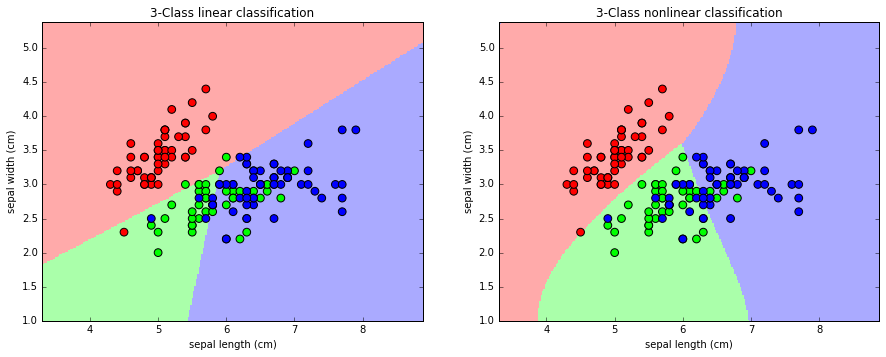

In [14]:
# A demonstration of classification using linear and nonlinear algorithms.
%run plot_classification.py

### 2.5 Exploratory data analysis

Exploratory data analysis (EDA) is a critical first step in any data analysis project, and is useful for the following reasons:

- Detecting errors in data;
- Validating our assumptions;
- Guide in the selection of appropriate models;
- Determining relationships among the explanatory variables; and
- Assessing the direction and size (roughly) of relationships between predictor/explanatory and response/target variables.

You have already been using a number of basic EDA tools ("df.info()" and "df.describe()") that analysts use to get a glimpse of the data they will be working with. Other useful EDA approaches include the preliminary screening of variables to assess how they relate to the response variable(s). The following section demonstrates how you can explore differences in the distributions of features between the groups you are interested in.

In [15]:
# First extract the groups by target variable.
sub_gr=df.groupby('attributes__sub')

#### 2.5.1 Are there any differences in the distribution of “call durations” between the two groups?

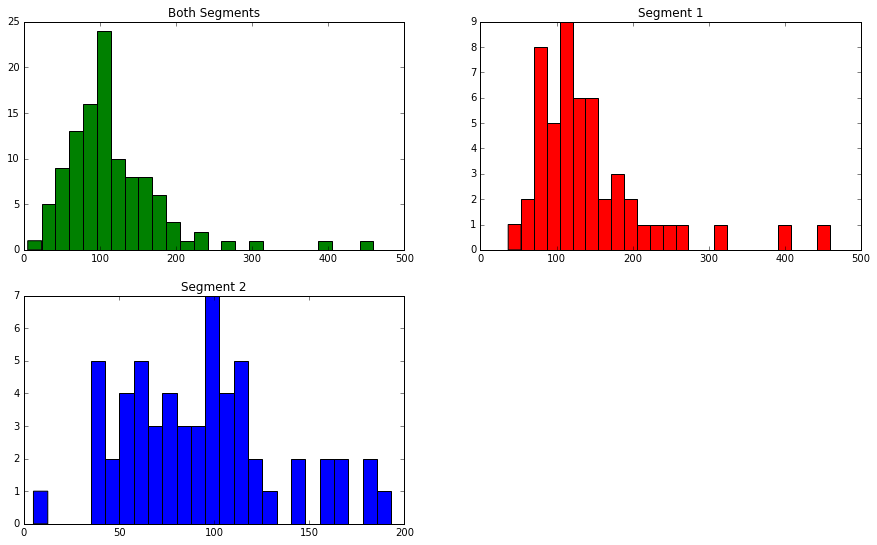

In [16]:
# Plot both segments.
plt.subplot(2,2,1)
_ = plt.hist(df['call_duration__allweek__allday__call__mean__mean'].dropna(), bins=25, color='green')
plt.title('Both Segments')

# Plot Segment 1.
plt.subplot(2,2,2)
_ = plt.hist(sub_gr.get_group(0) ['call_duration__allweek__allday__call__mean__mean'].dropna().values, bins=25, color='red') 
plt.title('Segment 1')

# Plot Segment 2.
plt.subplot(2,2,3)
_ = plt.hist(sub_gr.get_group(1)['call_duration__allweek__allday__call__mean__mean'].dropna().values,bins=25)
plt.title('Segment 2')

#### 2.5.2 Are there any differences in the distribution of the number of interactions between the two groups?

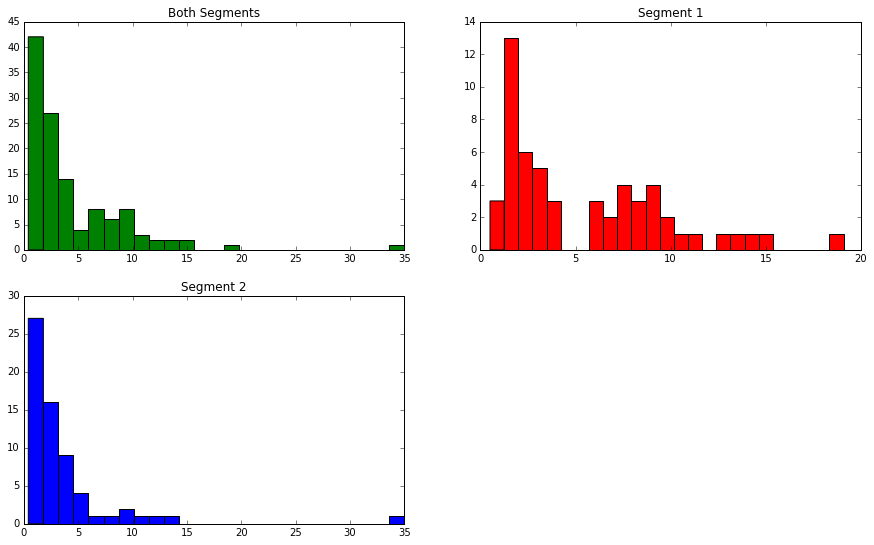

In [17]:
# Plot both segments.
plt.subplot(2,2,1)
#df['call_duration__allweek__allday__call__mean__mean'].hist(bins=100)
_ = plt.hist(df['number_of_interaction_in__allweek__night__text__mean'].dropna(), bins=25, color='green')
plt.title('Both Segments')

# Plot Segment 1.
plt.subplot(2,2,2)
_ = plt.hist(sub_gr.get_group(0)['number_of_interaction_in__allweek__night__text__mean'].dropna().values, bins=25, color='red')
plt.title('Segment 1')

# Plot Segment 2.
plt.subplot(2,2,3)
_ = plt.hist(sub_gr.get_group(1)['number_of_interaction_in__allweek__night__text__mean'].dropna().values,bins=25)
plt.title('Segment 2')

## 2.6 Data preprocessing

In order to make use of the machine learning tools, the data needs to be preprocessed. This involves a number of activities such as:
- Assigning numerical values to categorical data;
- Handling missing values; and
- Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).
>**Note:** Small scales imply big value. For example, assume you are classifying people based on their physiological characteristics. A small-scale feature would be height (measured in meters) compared to weight (measured in kilograms).

First, filter the data set to only return records that have a non-null label. The target variable is a socioeconomic binary indicator that is in the column labeled "df.attributes__sub".

#### 2.6.1 Drop records with missing label information

In [18]:
# Drop records with missing labels in the target variable.
df = df[~df.attributes__sub.isnull()]

In [19]:
# Review the target or response variable.
y = df.attributes__sub.astype(np.int).values
y

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

#### 2.6.2 Feature transformation

In [20]:
# Convert gender labels to binary values (zero or one):
d = {'male': 0, 'female': 1}
df.attributes__gender.replace(d, inplace=True)

/home/ubuntu/.local/lib/python2.7/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### 2.6.3 Drop non-informative columns

In [21]:
# Remove columns with reporting variables and attributes (that is, the first 39 and the last 2).
df = pd.concat([df[df.columns[39:-5]],df[df.columns[-3]]], axis=1)

In [22]:
# Identify features with constant values, or contain only missing values. 
to_drop = (df.std().isnull()) |(abs(df.std()) < 1e-6)

In [23]:
# Keep only the columns with variability.
to_keep = np.where(~to_drop.values)[0]
df = df.iloc[:,to_keep]

In [24]:
# Assign predictors to a variable of ndarray (matrix) type .
X = df.values
X

array([[ 5.59091,  1.38692,  5.22727, ...,  1.40909,  1.55678,  1.     ],
       [ 4.09091,  2.55679,  4.09524, ...,  0.     ,  0.     ,  0.     ],
       [ 4.52632,  1.90203,  4.05263, ...,  2.75   ,  1.29904,  1.     ],
       ..., 
       [ 5.75556,  1.35246,  5.2    , ...,  2.125  ,  1.80998,  1.     ],
       [ 6.06818,  1.32112,  5.68182, ...,  2.375  ,  2.14695,  1.     ],
       [ 3.1    ,  1.51327,  2.71429, ...,  0.     ,  0.     ,  0.     ]])

#### 2.6.4 Imputing missing values

Data collected from experiments often contains missing values. Unfortunately, missing values can reduce the number of usable records for model building. In many cases, however, imputing the missing values can give better results than discarding affected samples. The effect of imputing missing values on model performance needs to be validated, because sometimes dropping affected rows can be more effective.
A number of strategies are available for imputing. With Scikit-Learn, missing values can be replaced by the mean, the median or the most frequent value. In the following, you will replace missing values using the mean of the valid values for that field. 

In [25]:
# Impute the missing values using the mean values of the respective features.
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)

In [26]:
X

array([[ 5.59091,  1.38692,  5.22727, ...,  1.40909,  1.55678,  1.     ],
       [ 4.09091,  2.55679,  4.09524, ...,  0.     ,  0.     ,  0.     ],
       [ 4.52632,  1.90203,  4.05263, ...,  2.75   ,  1.29904,  1.     ],
       ..., 
       [ 5.75556,  1.35246,  5.2    , ...,  2.125  ,  1.80998,  1.     ],
       [ 6.06818,  1.32112,  5.68182, ...,  2.375  ,  2.14695,  1.     ],
       [ 3.1    ,  1.51327,  2.71429, ...,  0.     ,  0.     ,  0.     ]])

These two sets of the data ($X$ and $y$) are then used to build the classifier, and contain the following information:
> The array Y contains the labels you want to predict, representing the socioeconomic status of a person as 0 or 1. These labels are sometimes referred to as “Class 0” and “Class 1” in this notebook. The matrix X contains the features for all of the users (one column for one feature, and one line for one user).


#### 2.6.5 Normalization
Normalize the data to center it around zero and transform it to a similiar scale to prevent variables in "small" units (and therefore high values) to dominate the classification unreasonably.

In [27]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler = preprocessing.StandardScaler()
Xs = scaler.fit_transform(X)

## 2.7 Feature selection
Before you build a classification model, you will perform variable screening to weed out variables that are either ill-conditioned or simply contain no information that will help in predicting the action of interest.  Feature variables that are constant, or contain only missing values, are the first target to remove as these do not add any information to the predictive model. 

A useful technique in preliminary variable screening is identifying features that have significant correlation to the target variable. There is a well-established methodology that uses the concepts of  "weight of evidence" and "information value" (Siddiqi 2005), which are based on information theory (Kullback 1959). For the present case, you will focus on using the correlation matrix of the features and target variable.

In [28]:
def correlation_matrix(df):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Bandicoot Feature Correlation')
    labels = None
    # Add colorbar, and make sure to specify tick locations to match desired ticklabels.
    cbar = fig.colorbar(cax, ticks=[-1.1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6,.8,1])
    plt.show()

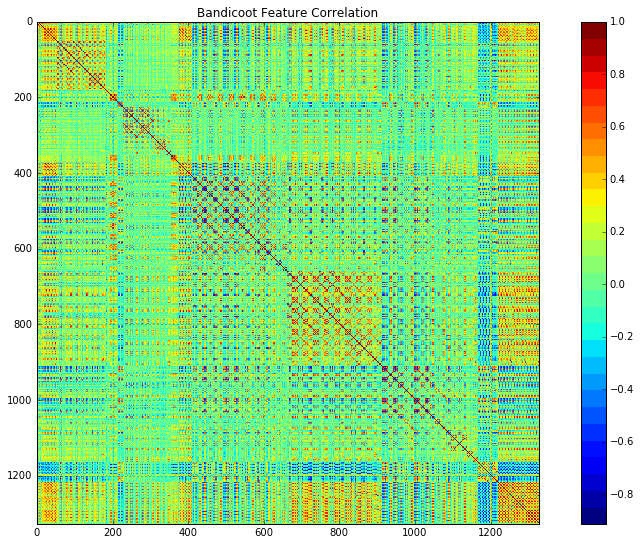

In [29]:
correlation_matrix(pd.DataFrame(np.c_[Xs,y]))

In [30]:
# Plot the correlations between all of the features and the target variable.
ycorr = pd.DataFrame(pd.DataFrame(np.c_[Xs,y]).corr().as_matrix()[:,-1], columns=['xycor'])

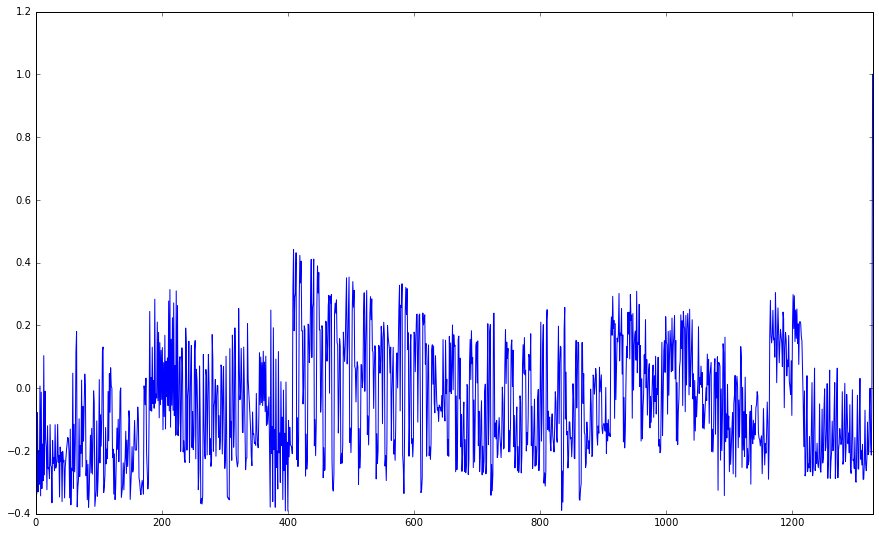

In [31]:
ycorr.xycor.plot(kind='line')

It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give you an unbiased estimated of your model's true performance. Hence, in the next section you will first be introduced to cross-validation, before applying the correlation-based feature selection strategy in the model building pipeline.

## 2.8 Classification with cross-validation
Initially, the support vector machines (SVMs) learning algorithm will be used to build the predictive model.

SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995). A rough, intuitive [explanation of how SVMs work](http://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work) can be found on the data school website.

As seen in the video content, and explained earlier in the notebook, splitting the data into test and training sets is crucial to avoid overfitting and, therefore, allows you to generalize to real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we can specify so-called folds so that the data is divided into similarly-sized folds. Training occurs by taking all folds except one – referred to as the holdout sample. On the completion of the training, you test the performance of your fitted model using the holdout sample. The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample. Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample. The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample. This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [32]:
# 5. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=3, stratify=y)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# 7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print '\nThe classifier accuracy score is {:.2f}\n'.format(classifier_score)


The classifier accuracy score is 0.69



To get a better measure of prediction accuracy (which you can use as a proxy for “goodness of fit” of the model), you can successively split the data into folds that you will use for training and testing:

In [33]:
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)


The 3-fold cross-validation accuracy score for this classifier is 0.67



The above evaluations were based on using the entire set of features. You will now employ the correlation-based feature selection strategy to assess the effect of using 100 features which have the best correlation with the class labels.


In [34]:
clf2 = make_pipeline(SelectKBest(f_regression, k=100),
                    SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

In [35]:
print scores
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print "Average score and uncertainty: (%.2f +- %.3f)%%"%avg

[ 0.6744186   0.60465116  0.75609756]
Average score and uncertainty: (67.84 +- 3.573)%


From the above results, you can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features.

Feature selection is an important part of the model-building process that you must always pay particular attention to. The details are beyond the scope of this notebook. In the rest of the analysis, you will continue using the entire set of features.

## 2.9 Receiver operating characteristic (ROC) curve. 

In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy is Area Under the Curve (AUC), where, by “curve”, the ROC curve is implied. ROC is a term that originated from the Second World War and was used by radar engineers (it had nothing to do with machine learning or pattern recognition).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted). A cell in the table is then an intersection where the conditions on each of the dimensions hold. For example, in the top left cell, the model condition is "A" and the ground truth is also "A". The count of instances where these two conditions are true (for a specific data point) is captured, hence the label “True positive”. The same logic applies to the rest of the cells. The total of the counts in these cells should therefore equal the number of data instances in the data set under consideration.


~~~~
                        Model says "+"     Model says  "-"

      Actual: "+"       True positive   |   False negative
                      ----------------------------------
      Actual: "-"       False positive  |   True negative
  
~~~~



In an ROC curve, you plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:

> True positive rate (or sensitivity)}:  **tpr = tp / (tp + fn)**

> False positive rate:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                   **fpr = fp / (fp + tn)**

> True negative rate (or specificity):   **tnr = tn / (fp + tn)**

In all definitions, the denominator is a row margin in the above confusion matrix. You can therefore express the true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").

To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

For the points above the diagonal, **tpr** > **fpr**, and the model says that you are in a zone where you are performing better than random. For example, assume **tpr ** = 0.6 and **fpr** = 0.2.Then, the probability of being in the true positive group is $(0.6 / (0.6 + 0.2)) = 75\%$. Furthermore, holding **fpr** constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification model.

### 2.9.1 "Friends and Family" dataset: Positive and negative classes 

For the “Friends and Family” data set, the label or class variable takes one of two values: 0 or 1. In the following, "Class 0" or "Class 1" will be used to refer to these labels. In addition, it is assumed that "Class 0" is the positive class.

In [36]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(cm)

[[10  8]
 [ 4 17]]


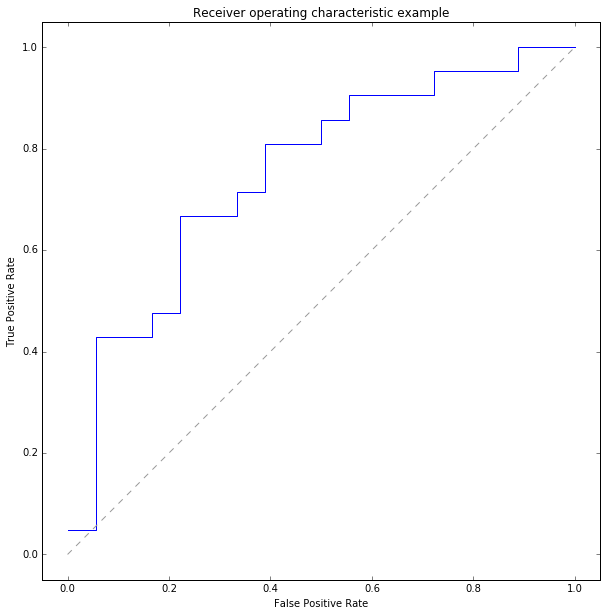

In [37]:
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(20,10))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

<br>
<div class="alert alert-info">
<b>Exercise 2 Start.</b>
</div>

### Instructions
 > What do the score and ROC curve tell you about the classifier model you have built, and how it compares to "flipping an unbiased coin" (random) in order to determine the class to which an observed data point belongs?
 
> **Hint**:
> Review further details regarding the [ROC curve and its interpretation](http://pubs.rsna.org/doi/pdf/10.1148/radiographics.12.6.1439017), if you wish.

Provide your answer in a markdown cell below.

It is clear from the Area Under the Curve that our model is slightly more accurate than a random, unbiased coin. We see a greater rate of true positives than our "50/50" comparison line. Although this is to be taken with a grain of salt as recently the AUROC has been criticized for being slightly "noisy" and "unreliable". 

<br>
<div class="alert alert-info">
<b>Exercise 2 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

<br>
<div class="alert alert-info">
<b>Exercise 3 Start.</b>
</div>

### Instructions
 > 1. How many data points in the test set from Class 1 were predicted as Class 1 by the trained classifier?
 > 2. How many data points in the test set from Class 1 were predicted as Class 0 by the trained classifier?
 > 3. How many data points in the test set from Class 0 were predicted as Class 0 by the trained classifier?
 > 4. How many data points in the test set from Class 0 were predicted as Class 1 by the trained classifier?
 > 5. What is the error rate on the test set for this classifier?
 > 6. Assuming Class 0 as the positive class, can you calculate the true positive rate or sensitivity of this classifier?
 > 7. What is the specificity?
 
 **Hints:**
 > Review descriptions and formulae for [sensitivity and specificity](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC200804/pdf/bmj32700716.pdf).
 
 
 **Important:**
 > You are expected to use one-liner code cells in answering these questions. The first question will be used to demonstrate the required response, using two options that are available to you. That is, direct evaluation, and using the confusion matrix.
 - #Direct evaluation.
>
 ``print sum((y_pred==1) & (y_test==1))``
>
>
 - ``#Using the confusion matrix.``
 >
 ``print cm[1,1]``



In [43]:
print cm[1,1]

17


In [47]:
print cm[1,0]

4


In [48]:
print cm[0,0]

10


In [49]:
print cm[0,1]

8


In [50]:
#Error Rate is the number of incorrect predictions divided by the total number of cases
print (12.0/39.0)*100

30.7692307692


In [51]:
#sensitivity = number of true positives / predicted number of positives
print (10.0/14.0)

0.714285714286


In [52]:
#specificity = number of true negatives / predicted number of negatives
print (17.0/25.0)

0.68


<br>
<div class="alert alert-info">
<b>Exercise 3 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

# 3. Optimal classifier parameters

The examples above made use of the "``SVC()``" function (using default parameters). Usually, you would want to optimize the setting of these parameters for a given problem, as these are learned by the algorithm during the training phase. In the case of support vector classifiers, these parameters include the choice of the kernel,
the kernel parameters (Gaussian kernel: $\gamma$; Polynomial kernel: $d$), as well as the penalty for misclassification ($C$). For an illustration of [the behavior of these and other kernels](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html), explore the Scikit-learn resource. 

Tuning parameters for an optimal solution is inherently difficult. A popular approach is to perform a search over the grid (defined across the various parameters to be optimized for). The grid search function is illustrated next. This illustration considers how to optimize over two parameters – $C$ (misclassification cost), and $\gamma$ (The RBF kernel parameter).

In [53]:
# Train classifiers.
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [54]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.001} with a score of 0.69


In [55]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

In [56]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(cm)

[[10  8]
 [ 4 17]]


## 3.1 Using other classifiers

The SVM classifier is only one of the classifiers that you have at your disposal. There are other classification methods implemented in Scikit-learn (as well as Mlxtend) that you can easily use. These include:

- Decision trees with ``tree.DecisionTreeClassifier()``;
- K-nearest neighbors with ``neighbors.KNeighborsClassifier()``;
- Random forests with ``ensemble.RandomForestClassifier()``;
- Perceptron (both gradient and stochastic gradient) with ``mlxtend.classifier.Perceptron``; and 
- Multilayer perceptron network (both gradient and stochastic gradient) with ``mlxtend.classifier.MultiLayerPerceptron``.

It is important to understand the underlying technique, as well as the corresponding implementation, in order to correctly interpret the output, or tune the estimator parameters. The following example illustrates the use of some of these classifiers on the data set, using the above-mentioned libraries.

In [57]:
# Create an instance of random forest classifier, fit the data, and assess performance on test data.
clf_rf = ensemble.RandomForestClassifier(n_estimators=200,n_jobs=-1,max_depth=5 )    
n_folds = 3
cv_error = np.average(cross_val_score(clf_rf, 
                                      X_train, 
                                      y_train, 
                                      cv=n_folds))
clf_rf.fit(X_train, y_train)
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)                             


The 3-fold cross-validation accuracy score for this classifier is 0.69



In [58]:
# Create an instance of logistic regression classifier, fit the data, and assess performance on test data.
clf_logreg = linear_model.LogisticRegression(C=1e5)    
n_folds = 3
cv_error = np.average(cross_val_score(clf_logreg, 
                                      X_train, 
                                      y_train, 
                                      cv=n_folds))
clf_logreg.fit(X_train, y_train)
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error) 


The 3-fold cross-validation accuracy score for this classifier is 0.70



In [59]:
# Create an instance of decision tree classifier, fit the data, and assess performance on test data.
clf_tree = tree.DecisionTreeClassifier()
n_folds = 3
cv_error = np.average(cross_val_score(clf_tree, 
                                      X_train, 
                                      y_train, 
                                      cv=n_folds))
clf_tree = clf_tree.fit(X_train, y_train)
print '\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)



The 3-fold cross-validation accuracy score for this classifier is 0.56



In [60]:
# Create an instance of multilayer perceptron classifier (gradient descent), fit the data, and assess performance on test data.
clf_nn1 = MLP(hidden_layers=[40],l2=0.00,l1=0.0,epochs=150,eta=0.05,momentum=0.1,decrease_const=0.0,minibatches=1,random_seed=1,print_progress=3)
clf_nn1 = clf_nn1.fit(X_train, y_train)
clf_nn1.score(X_test, y_test)

Iteration: 150/150 | Cost 4.91 | Elapsed: 0:00:16 | ETA: 0:00:00

0.71794871794871795

In [61]:
# Create an instance of multilayer perceptron classifier (stochastic gradient descent), fit the data, and assess performance on test data.
clf_nn2 = MLP(hidden_layers=[40],l2=0.00,l1=0.0,epochs=50,eta=0.05,momentum=0.1,decrease_const=0.0,minibatches=len(y_train),random_seed=1,print_progress=3)
clf_nn2 = clf_nn2.fit(X_train, y_train)
clf_nn2.score(X_test, y_test)

Iteration: 50/50 | Cost 0.00 | Elapsed: 0:00:56 | ETA: 0:00:00

0.74358974358974361

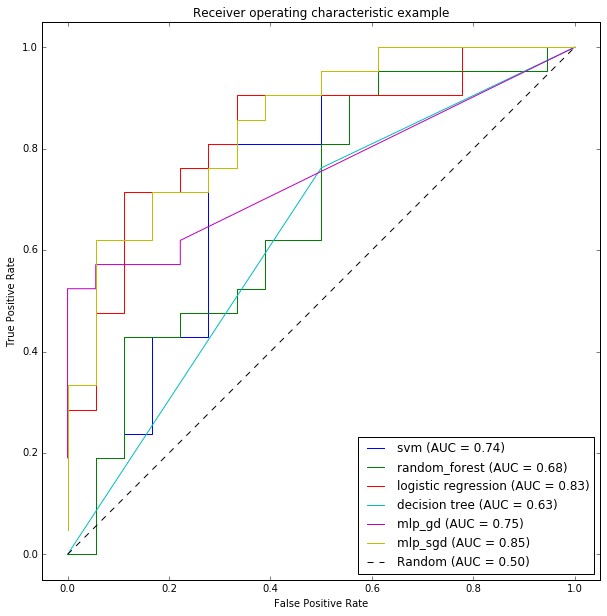

In [62]:
# Plot the results.
colors = ['b', 'g', 'r','c','m','k','y']
classifiers = ['svm','random_forest', 'logistic regression', 'decision tree', 'mlp_gd', 'mlp_sgd']
plt.figure(figsize=(20,10))
for i, cl in enumerate([clf, clf_rf, clf_logreg, clf_tree,clf_nn1, clf_nn2]):
    probas_ = cl.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label=classifiers[i]+' (AUC = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], '--', color=colors[i], label='Random (AUC = 0.50)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)
plt.legend(loc="lower right")

<br>
<div class="alert alert-info">
<b>Exercise 4 Start.</b>
</div>

### Instructions
1. Provide general comments on the performance of the different classifiers, based on the ROC plots.
2. List two limitations to be aware of when using ROC curves to assess classifier performance.
3. List two ways to improve performance of general machine learning models.

    
 **Hints:**
 > - As part of your general comments (Question 1), rank the different classifiers based on their overall performance. Additionally, include comments on the relative performance of each classifier as the false positive rate is increased. 
 
 > - In Question 3, consider whether the use of an ensemble of these classifiers (based on majority vote) could improve the observed performance of the best classifier.
 >>*Majority voting refers to using multiple classifiers for decision-making, and returning as output the class which is in the majority. In other words, each classifier's output is considered a vote and the output that has the most votes is the winner.*

1. Classifier rankings: mlp_sgd, logistic regression, mlg_gd, svm, random_forest, decision tree
    mlp_gd starts strong but loses accuracy
    desicion tree is consistant, but lacks accuracy
2. Two limitations regarding ROC analysis:
   * ROC is typically more beneficial earlier in test assessment
   * Test results from one population may not be predictive of the results for another population
3. Two way to improve performance:
    * using the right variable, weights, and threshholds
    * combining strengths of the human along with strengths of the machine

<div class="alert alert-info">
<b>Exercise 4 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

<br>
<div class="alert alert-info">
<b>Exercise 5 [Advanced] Start.</b>
</div>

### Instructions
 > 1. Build a $k$-nearest neighbor classifier (using scikit-learn) for $k=5$, and add it to the ROC plot, as shown above. 
 > 2. What effect does varying $k$ have on the resulting classifier?
    
 **Hints**
 > You will need to copy and paste the plot commands from above, and then modify the code by including the relevant code for a $k$-nearest neighbor classifier.

In [ ]:
# Your answer here.

<br>
<div class="alert alert-info">
<b>Exercise 5 [Advanced] End.</b>
</div>


> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

# 4. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb)"; and
- Submit a copy of this file to the Online Campus.

# 5. References
Blumenstock, Joshua, Gabriel Cadamuro, and Robert On. 2015. “Predicting poverty and wealth from mobile phone metadata.” Science 350: 1073-1076.

Cortes, Corinna, and Vladimir Vapnik. 1995. “Support-Vector Networks.” Machine Learning  20: 273. Accessed September 3, 2016. doi: 10.1023/A:1022627411411.

Jahani, Eaman, Pal Roe Sundsoy, Johannes Bjelland, Asif Iqbal, Alex Pentland, and Yves-Alexandre de Montjoye. 2015. “Predicting Gender from Mobile Phone Metadata.” Paper presented at the Netmob Conference, Massachusetts Institute of Technology, Cambridge, April 8-10.

Kullback, Solomon. 1959. *Information Theory and Statistics*. New York: Wiley.

Overseas Development Institute. 2015. “The data revolution: Finding the missing millions.” Accessed September 3. https://www.odi.org/sites/odi.org.uk/files/odi-assets/publications-opinion-files/9604.pdf. 

SAS Institute. 2016. “Machine Learning: What it is and why it matters.” Accessed September 3. http://www.sas.com/en_id/insights/analytics/machine-learning.html. 

Siddiqi, Naeem. 2005. *Credit Risk Scorecards: Developing and Implementing Intelligent Credit Scoring*. Hoboken, N.J., Wiley.
